## Example `stata_kernel` Jupyter notebook

This Jupyter notebook is an example of how you can use Stata in the Jupyter ecosystem using `stata_kernel`.

Full documentation, including how to install, is available at https://kylebarron.dev/stata_kernel/.

## Overview

The Jupyter Notebook is a file format that permits interactive coding with text, code, and results in a single document. You can share a notebook file (with extension `.ipynb`), and results will be viewable without running the code, but as long as the recipient also has Jupyter installed, he or she can edit and re-run the code cells.

Jupyter itself is language agnostic, i.e. it permits writing code in any language. This document uses Stata code, but you can also code in Jupyter using Python, [R](https://irkernel.github.io/), [Julia](https://github.com/JuliaLang/IJulia.jl), [Matlab](https://github.com/calysto/matlab_kernel), and [SAS](https://github.com/sassoftware/sas_kernel). 

## Running code

In contrast to [IPyStata](https://github.com/TiesdeKok/ipystata), no special commands are needed. Just write code as you would normally in Stata.

Let's make sure that the connection with Stata is working properly.

In [1]:
display "Hello, world!"

Hello, world!


You can run a cell by pressing <kbd>Ctrl</kbd>+<kbd>Enter</kbd> or <kbd>Shift</kbd>+<kbd>Enter</kbd>. If a number appears in the brackets to the left of the input cell, that means that the code was successfully run (sometimes a cell doesn't produce any output).

If you don't see `Hello, world!` as output, check out the [troubleshooting tips](https://kylebarron.dev/stata_kernel/using_stata_kernel/troubleshooting/).

Let's load the included `auto` dataset.

In [2]:
sysuse auto.dta

(1978 Automobile Data)


Now the `auto` dataset is in memory.

### Basic descriptive statistics

Nearly all commands that work in Stata work through Jupyter as well. A couple commands that depend on the Graphical User Interface, such as `browse` and `edit`, only work on Windows.

In [3]:
tabulate foreign headroom


           |                                     Headroom (in.)
  Car type |       1.5        2.0        2.5        3.0        3.5        4.0        4.5        5.0 |     Total
-----------+----------------------------------------------------------------------------------------+----------
  Domestic |         3         10          4          7         13         10          4          1 |        52 
   Foreign |         1          3         10          6          2          0          0          0 |        22 
-----------+----------------------------------------------------------------------------------------+----------
     Total |         4         13         14         13         15         10          4          1 |        74 


## Graphs

No special syntax is needed to generate graphs. Just write commands like you're used to.
The display order of graphs will always be the same as the order in the code.


(highschool and beyond (200 cases))


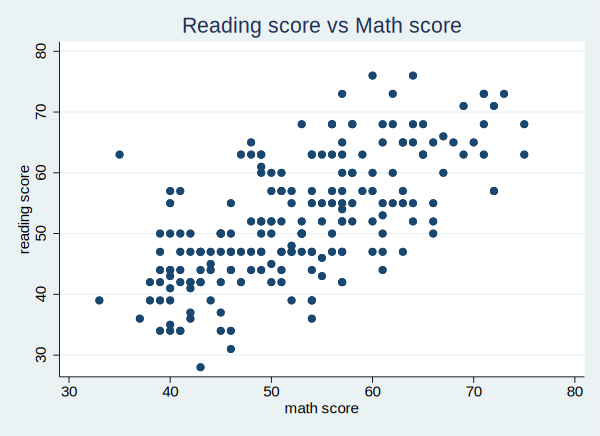

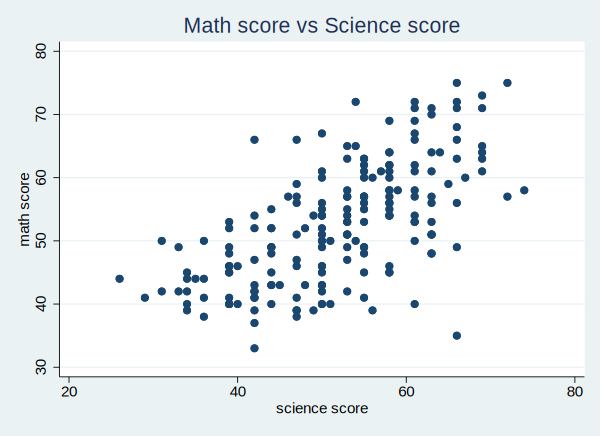

In [4]:
// Dataset with test scores
use "https://stats.idre.ucla.edu/stat/stata/notes/hsb2", clear
scatter read math, title("Reading score vs Math score")
scatter math science, title("Math score vs Science score")

If you don't want to display a graph, just prefix the command with [`quietly`](https://www.stata.com/help.cgi?quietly).

In [5]:
quietly scatter read math, title("Reading score vs Math score")

## Comments in code

`stata_kernel` lets you use _any_ format of comments, including `//`, `///`, `*`, and `/*`-`*/`, even in an interactive console environment where the Stata command line normally wouldn't accept them.

In [6]:
display "displayed"
// display "comment"

displayed


In [7]:
display "line continuation " /// comment
    "comment"

line continuation comment


In [8]:
* display "not displayed"

In [9]:
display "displayed1"
/*
display "displayed2"
*/
display "displayed3"


displayed1

displayed3


## Autocompletion

`stata_kernel` provides autocompletion for locals, globals, variables, scalars, and matrices based on the contents in memory. It also suggests file paths to load or save files. Press <kbd>Tab</kbd> while typing to activate it.

![](https://raw.githubusercontent.com/kylebarron/stata_kernel/master/docs/src/img/jupyterlab_autocompletion.png)

## Magics

[_Magics_](https://kylebarron.dev/stata_kernel/using_stata_kernel/magics/) are special commands that `stata_kernel` provides to give extra functionality, especially regarding the connection with Jupyter. 

These commands all start with `%`. You can run `%help magics` or [go here](https://kylebarron.dev/stata_kernel/using_stata_kernel/magics/) to see a list of available magics. You can also run `%magic_name --help` to see the help for any given magic.

In order to prevent confusion, these commands **must** occur at the beginning of a cell.

### `%head`, `%browse`, `%tail`

**`%head`**, **`%browse`**, and **`%tail`** show a well-formatted portion of the dataset in memory.

In [10]:
%head 5

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
1,70,male,white,low,public,general,57,52,41,47,57
2,121,female,white,middle,public,vocation,68,59,53,63,61
3,86,male,white,high,public,general,44,33,54,58,31
4,141,male,white,high,public,vocation,63,44,47,53,56
5,172,male,white,middle,public,academic,47,52,57,53,61


### `%help`
**`%help`** shows the help menu for a given command. The links in this help file are clickable, just like the official Stata documentation. (This command requires internet access.)

In [11]:
%help summarize

This front-end cannot display HTML help.

### `%locals`, `%globals`

**`%locals`** and **`%globals`** display the local or global macros in the current environment.

In [12]:
local local1 "foo"
local local2 "bar"
local abcd "foo bar"

In [13]:
%locals

abcd:   foo bar
local2: bar
local1: foo


In [14]:
%locals loc

local2: bar
local1: foo


In [15]:
%globals

(note: showing first line of global values; run with --verbose)

T_gm_fix_span:              0
stata_kernel_graph_counter: 2
S_FNDATE:                   17 Jun 2002 08:48
S_FN:                       https://stats.idre.ucla.edu/stat/stata/notes/hsb2.dta
S_ADO:                      BASE;SITE;.;PERSONAL;PLUS;OLDPLACE;`"/Users/kyle/github/stata/stata-kernel/stata_kernel/ado"'
S_level:                    95
F1:                         help advice;
F2:                         describe;
F7:                         save
F8:                         use
S_StataSE:                  SE
S_CONSOLE:                  console
S_FLAVOR:                   Intercooled
S_OS:                       Unix
S_MACH:                     Macintosh (Intel 64-bit)


### `%html`, `%latex`

**`%html`** and **`%latex`** attempt to display either type of _output_ (not user input). This could be used, for example, with `estout` to display several regression results side-by-side.

**Note:** Jupyter can display a math subset of LaTeX but doesn't support tables. _However_, it's really easy to export a Jupyter Notebook file to PDF through LaTeX (see File > Export Notebook As > Export Notebook to PDF). In this PDF export, LaTeX tables _will_ be properly displayed.

In [16]:
cap ssc install estout
sysuse auto, clear
eststo clear
eststo: qui regress price mpg rep78
eststo: qui regress price mpg rep78 gear_ratio trunk
eststo: qui regress price mpg rep78 gear_ratio trunk weight displacement



(1978 Automobile Data)


(est1 stored)

(est2 stored)

(est3 stored)


In [17]:
%html
esttab, label title("Regression Table") html

This front-end or document format cannot display HTML

### `%show_gui`, `%hide_gui`

On Windows, **`%show_gui`** and **`%hide_gui`** show and hide the traditional Stata Graphical User Interface window. These magics do not work on macOS or Linux because those platforms communicate with Stata in a different manner.

## `;`-delimited commands

Often with long commands, such as graphs, using [`#delimit ;`](https://www.stata.com/help.cgi?delimit) helps prevent very long lines and helps to keep code more readable. This is supported in `stata_kernel`, despite it not being allowed in the normal Stata command-line environment.

In [18]:
sysuse auto, clear

(1978 Automobile Data)


In [19]:
#delimit ;
display "Hello, world!";

Hello, world!
delimiter now ;

It's important to note that the `;`-delimiter mode persists across cells. `stata_kernel` will expect cells to include `;` for each command, and will raise an error if `;` is missing.

In [20]:
display "Hello, world!"

stata_kernel error: code entered was incomplete.

This usually means that a loop or program was not correctly terminated.
This can also happen if you are in `#delimit ;` mode and did not end the
command with `;`. Use `%delimit` to see the current delimiter mode and
use `#delimit cr` to switch back to the default mode where `;` is
unnecessary.


You can check the current delimiter with the **`%delimit`** magic.

In [21]:
%delimit

The delimiter is currently: ;


You can switch back to normal line-break delimited commands (i.e. where `;` is unnecessary) with `#delimit cr`.

In [22]:
#delimit cr

delimiter now cr

## Using Mata

You can start an interactive Mata session by typing `mata`. This persists across cells; cells will continue being Mata cells until you run `end` to exit the mata session.

You can run the **`%status`** magic to check if you're in Mata or Stata mode.

In [23]:
sysuse auto, clear

(1978 Automobile Data)


In [24]:
mata

------------------------------------------------- mata (type end to exit) -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [25]:
%status

stata_kernel 1.9.0 for Stata 15.1


	Delimiter:   cr
	Environment: Mata


In [26]:
y    = st_data(., "price")
X    = st_data(., "mpg trunk")
n    = rows(X)
X    = X,J(n,1,1)
XpX  = quadcross(X, X)
XpXi = invsym(XpX)
b    = XpXi*quadcross(X, y)

In [27]:
b'

                  1              2              3
    +----------------------------------------------+
  1 |  -220.1648801    43.55851009    10254.94983  |
    +----------------------------------------------+


In [28]:
end


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [29]:
%status

stata_kernel 1.9.0 for Stata 15.1


	Delimiter:   cr
	Environment: Stata
